In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint

#Describe data

Our dataset contains 11 health indicators along with a variable to indicate whether or not a patient has heart disease. The goal of our models is to use the indicator to predict whether or not a patient has a cardiovascular disease. Our columns are as follows:


* patient ID
* age in days
* gender
* height
* weight
* arterial pressure- high
* arterial pressure- low
* cholesteral category
* glucose
* smokes
* drinks alcohol
* is active



In [ ]:
data = pd.read_csv('gdrive/My Drive/UCI/Spring Quarter/Advanced Machine Learning-290/Final Project/cardio.csv')

FileNotFoundError: ignored

In [ ]:
#caesar
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cardio_train.csv')

FileNotFoundError: ignored

In [ ]:
#Marianna
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/cardio.csv')

In [ ]:
#Karl
data = pd.read_csv("/content/gdrive/MyDrive/MSBA-UCI/290 - Advanced Machine Learning/Code/cardio.csv")

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Split into Training, Testing, and Validation

In [ ]:
seed = 123
random.seed(seed)

In [ ]:
data.shape

(70000, 13)

In [ ]:
train_samp = random.sample(range(data.shape[0]), 42000)
training = data.iloc[train_samp, :]
training.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6863,9789,16164,1,161,83.0,120,70,1,3,0,0,1,1
35084,50129,14468,1,162,76.0,130,80,1,1,0,0,0,1
11427,16334,22571,1,167,70.0,120,80,2,1,0,0,0,0
53377,76162,15324,2,171,107.0,130,79,1,1,0,0,1,1
34937,49904,22424,1,164,77.0,120,80,1,2,0,0,0,1


## Separates train test and validation set (60%, 20%, 20%)

In [ ]:
train, validate, test = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [ ]:
#create X and Y sets for data
X_train = train.iloc[:,1:11]
Y_train = train.iloc[:,12:13]
X_crossv = validate.iloc[:,1:11]
Y_crossv = validate.iloc[:,12:13]
X_test = test.iloc[:,1:11]
Y_test = test.iloc[:,12:13]

In [ ]:
Y_train

,cardio
44995,1
56003,1
18838,1
9372,1
8852,1
...,...
29000,1
39780,0
40831,1
14981,1


In [ ]:
#normalize the data
#age, height, weight, ap_hi, ap_lo all double
#cols 1, 3, 4, 5, 6
normalize_cols = [0, 2, 3, 4, 5]
def normalizeCol(x):
  x = x.to_numpy()
  for i in normalize_cols:
    denom = np.linalg.norm(x[:,i], ord = 2, keepdims=True)
    x[:,i] = x[:,i]/denom
  return pd.DataFrame(x)

In [ ]:
normalizeCol(X_train)

,0,1,2,3,4,5,6,7,8,9
0,0.004314,1.0,0.005456,0.006195,0.003396,0.001793,1.0,1.0,0.0,0.0
1,0.004120,1.0,0.004952,0.004646,0.003962,0.001793,1.0,1.0,0.0,0.0
2,0.004477,1.0,0.004745,0.004001,0.003396,0.001793,1.0,3.0,0.0,0.0
3,0.004355,2.0,0.004952,0.004195,0.003962,0.002017,1.0,1.0,0.0,0.0
4,0.005285,2.0,0.005219,0.005356,0.003396,0.001793,1.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
41995,0.005243,1.0,0.004537,0.003227,0.003962,0.002017,1.0,1.0,0.0,0.0
41996,0.005443,1.0,0.004804,0.003872,0.003396,0.001793,1.0,1.0,0.0,0.0
41997,0.004925,1.0,0.004804,0.004324,0.011348,0.001793,1.0,3.0,0.0,0.0
41998,0.003879,2.0,0.004834,0.004065,0.003396,0.001793,2.0,1.0,0.0,0.0


In [ ]:
X_train.iloc[:,1:2]

,gender
44995,1
56003,1
18838,1
9372,2
8852,2
...,...
29000,1
39780,1
40831,1
14981,2


In [ ]:
#normalize data
X_train = normalizeCol(X_train)
X_crossv = normalizeCol(X_crossv)
X_test = normalizeCol(X_test)

In [ ]:
X_train.shape

(42000, 10)

In [ ]:
#baseline
tf.keras.backend.clear_session()
model = Sequential([
    Dense(64, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 4s 4ms/step - loss: 0.6762 - recall: 0.4494 - precision: 0.5848 - true_positives: 8051.0000 - val_loss: 0.6715 - val_recall: 0.3574 - val_precision: 0.6530 - val_true_positives: 1112.0000
Epoch 2/20
558/558 [==============================] - 1s 2ms/step - loss: 0.6700 - recall: 0.3397 - precision: 0.6717 - true_positives: 6085.0000 - val_loss: 0.6686 - val_recall: 0.3375 - val_precision: 0.6595 - val_true_positives: 1050.0000
Epoch 3/20
558/558 [==============================] - 1s 2ms/step - loss: 0.6685 - recall: 0.3400 - precision: 0.6743 - true_positives: 6091.0000 - val_loss: 0.6676 - val_recall: 0.3359 - val_precision: 0.6601 - val_true_positives: 1045.0000
Epoch 4/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6679 - recall: 0.3481 - precision: 0.6691 - true_positives: 6235.0000 - val_loss: 0.6668 - val_recall: 0.3365 - val_precision: 0.6593 - val_true_positives: 1047.0000
Epoch 5/20
558/558 [============

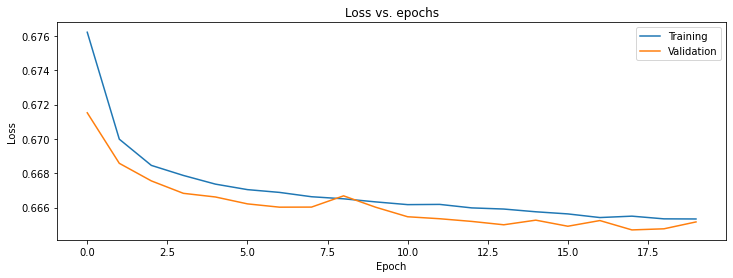

In [ ]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
#plt.plot(frame['binary_crossentropy'])
#plt.plot(frame['val_binary_crossentropy'])
#plt.title('binary_crossentropy vs. epochs')
#plt.ylabel('binary_crossentropy')
#plt.xlabel('Epoch')
#plt.legend(['Training', 'Validation'], loc='upper right')
#plt.show()

PART 1.C: Bigger NN

In [ ]:
tf.keras.backend.clear_session()
model2 = Sequential([
    Dense(64, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(128, activation="relu"),
    Dense(256, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

In [ ]:
history2 = model2.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 3s 3ms/step - loss: 0.6742 - recall: 0.4261 - precision: 0.6055 - true_positives: 7633.0000 - val_loss: 0.6682 - val_recall: 0.3317 - val_precision: 0.6598 - val_true_positives: 1032.0000
Epoch 2/20
558/558 [==============================] - 1s 3ms/step - loss: 0.6684 - recall: 0.3501 - precision: 0.6663 - true_positives: 6271.0000 - val_loss: 0.6670 - val_recall: 0.3529 - val_precision: 0.6497 - val_true_positives: 1098.0000
Epoch 3/20
558/558 [==============================] - 1s 3ms/step - loss: 0.6675 - recall: 0.3587 - precision: 0.6639 - true_positives: 6425.0000 - val_loss: 0.6665 - val_recall: 0.3738 - val_precision: 0.6418 - val_true_positives: 1163.0000
Epoch 4/20
558/558 [==============================] - 1s 3ms/step - loss: 0.6669 - recall: 0.3692 - precision: 0.6589 - true_positives: 6613.0000 - val_loss: 0.6658 - val_recall: 0.3738 - val_precision: 0.6422 - val_true_positives: 1163.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history3 = model3.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 3s 3ms/step - loss: 0.6743 - recall: 0.4475 - precision: 0.5930 - true_positives: 8017.0000 - val_loss: 0.6684 - val_recall: 0.3198 - val_precision: 0.6755 - val_true_positives: 995.0000
Epoch 2/20
558/558 [==============================] - 1s 3ms/step - loss: 0.6685 - recall: 0.3528 - precision: 0.6667 - true_positives: 6320.0000 - val_loss: 0.6670 - val_recall: 0.3198 - val_precision: 0.6755 - val_true_positives: 995.0000
Epoch 3/20
558/558 [==============================] - 1s 3ms/step - loss: 0.6674 - recall: 0.3577 - precision: 0.6603 - true_positives: 6408.0000 - val_loss: 0.6666 - val_recall: 0.3635 - val_precision: 0.6412 - val_true_positives: 1131.0000
Epoch 4/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6670 - recall: 0.3637 - precision: 0.6615 - true_positives: 6515.0000 - val_loss: 0.6661 - val_recall: 0.3764 - val_precision: 0.6413 - val_true_positives: 1171.0000
Epoch 5/20
558/558 [==============

In [ ]:
tf.keras.backend.clear_session()
model4 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history4 = model4.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 3s 3ms/step - loss: 0.6735 - recall: 0.4573 - precision: 0.5939 - true_positives: 8192.0000 - val_loss: 0.6691 - val_recall: 0.3632 - val_precision: 0.6551 - val_true_positives: 1130.0000
Epoch 2/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6680 - recall: 0.3501 - precision: 0.6684 - true_positives: 6272.0000 - val_loss: 0.6680 - val_recall: 0.3761 - val_precision: 0.6425 - val_true_positives: 1170.0000
Epoch 3/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6673 - recall: 0.3559 - precision: 0.6649 - true_positives: 6376.0000 - val_loss: 0.6665 - val_recall: 0.3234 - val_precision: 0.6743 - val_true_positives: 1006.0000
Epoch 4/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6668 - recall: 0.3621 - precision: 0.6654 - true_positives: 6487.0000 - val_loss: 0.6661 - val_recall: 0.3317 - val_precision: 0.6662 - val_true_positives: 1032.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history5 = model5.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 4s 5ms/step - loss: 0.6732 - recall: 0.4343 - precision: 0.6024 - true_positives: 7780.0000 - val_loss: 0.6679 - val_recall: 0.3221 - val_precision: 0.6757 - val_true_positives: 1002.0000
Epoch 2/20
558/558 [==============================] - 2s 4ms/step - loss: 0.6681 - recall: 0.3535 - precision: 0.6641 - true_positives: 6332.0000 - val_loss: 0.6669 - val_recall: 0.3224 - val_precision: 0.6759 - val_true_positives: 1003.0000
Epoch 3/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6674 - recall: 0.3566 - precision: 0.6670 - true_positives: 6389.0000 - val_loss: 0.6659 - val_recall: 0.3552 - val_precision: 0.6511 - val_true_positives: 1105.0000
Epoch 4/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6669 - recall: 0.3643 - precision: 0.6608 - true_positives: 6526.0000 - val_loss: 0.6659 - val_recall: 0.3761 - val_precision: 0.6414 - val_true_positives: 1170.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6 = model6.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 5s 7ms/step - loss: 0.6724 - recall: 0.3830 - precision: 0.6334 - true_positives: 6861.0000 - val_loss: 0.6677 - val_recall: 0.3343 - val_precision: 0.6599 - val_true_positives: 1040.0000
Epoch 2/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6679 - recall: 0.3516 - precision: 0.6656 - true_positives: 6298.0000 - val_loss: 0.6668 - val_recall: 0.3761 - val_precision: 0.6414 - val_true_positives: 1170.0000
Epoch 3/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6670 - recall: 0.3692 - precision: 0.6606 - true_positives: 6614.0000 - val_loss: 0.6654 - val_recall: 0.3430 - val_precision: 0.6652 - val_true_positives: 1067.0000
Epoch 4/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6667 - recall: 0.3687 - precision: 0.6591 - true_positives: 6605.0000 - val_loss: 0.6656 - val_recall: 0.3642 - val_precision: 0.6553 - val_true_positives: 1133.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model7 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history7 = model7.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 5s 7ms/step - loss: 0.6731 - recall: 0.4201 - precision: 0.6099 - true_positives: 7526.0000 - val_loss: 0.6679 - val_recall: 0.3378 - val_precision: 0.6746 - val_true_positives: 1051.0000
Epoch 2/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6683 - recall: 0.3479 - precision: 0.6690 - true_positives: 6232.0000 - val_loss: 0.6672 - val_recall: 0.3494 - val_precision: 0.6580 - val_true_positives: 1087.0000
Epoch 3/20
558/558 [==============================] - 4s 6ms/step - loss: 0.6673 - recall: 0.3602 - precision: 0.6663 - true_positives: 6452.0000 - val_loss: 0.6658 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 4/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6670 - recall: 0.3637 - precision: 0.6624 - true_positives: 6515.0000 - val_loss: 0.6666 - val_recall: 0.3854 - val_precision: 0.6364 - val_true_positives: 1199.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model8 = Sequential([
    Dense(64, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history8 = model8.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 5s 6ms/step - loss: 0.6733 - recall: 0.3449 - precision: 0.6539 - true_positives: 6178.0000 - val_loss: 0.6694 - val_recall: 0.3764 - val_precision: 0.6427 - val_true_positives: 1171.0000
Epoch 2/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6675 - recall: 0.3540 - precision: 0.6670 - true_positives: 6341.0000 - val_loss: 0.6661 - val_recall: 0.3401 - val_precision: 0.6515 - val_true_positives: 1058.0000
Epoch 3/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6670 - recall: 0.3697 - precision: 0.6591 - true_positives: 6623.0000 - val_loss: 0.6658 - val_recall: 0.3838 - val_precision: 0.6385 - val_true_positives: 1194.0000
Epoch 4/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6666 - recall: 0.3705 - precision: 0.6609 - true_positives: 6638.0000 - val_loss: 0.6653 - val_recall: 0.3828 - val_precision: 0.6400 - val_true_positives: 1191.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model9 = Sequential([
    Dense(64, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history9 = model9.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 3s 4ms/step - loss: 0.6777 - recall: 0.5379 - precision: 0.5625 - true_positives: 9636.0000 - val_loss: 0.6690 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 2/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6687 - recall: 0.3410 - precision: 0.6758 - true_positives: 6109.0000 - val_loss: 0.6672 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 3/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6675 - recall: 0.3479 - precision: 0.6715 - true_positives: 6232.0000 - val_loss: 0.6660 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 4/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6672 - recall: 0.3645 - precision: 0.6610 - true_positives: 6529.0000 - val_loss: 0.6660 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model10 = Sequential([
    Dense(128, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history10 = model10.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 3s 4ms/step - loss: 0.6739 - recall: 0.4038 - precision: 0.6178 - true_positives: 7234.0000 - val_loss: 0.6680 - val_recall: 0.3198 - val_precision: 0.6755 - val_true_positives: 995.0000
Epoch 2/20
558/558 [==============================] - 2s 4ms/step - loss: 0.6683 - recall: 0.3424 - precision: 0.6740 - true_positives: 6134.0000 - val_loss: 0.6675 - val_recall: 0.3407 - val_precision: 0.6503 - val_true_positives: 1060.0000
Epoch 3/20
558/558 [==============================] - 2s 3ms/step - loss: 0.6676 - recall: 0.3580 - precision: 0.6650 - true_positives: 6413.0000 - val_loss: 0.6665 - val_recall: 0.3552 - val_precision: 0.6500 - val_true_positives: 1105.0000
Epoch 4/20
558/558 [==============================] - 2s 4ms/step - loss: 0.6668 - recall: 0.3683 - precision: 0.6599 - true_positives: 6598.0000 - val_loss: 0.6654 - val_recall: 0.3552 - val_precision: 0.6500 - val_true_positives: 1105.0000
Epoch 5/20
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model11 = Sequential([
    Dense(64, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model11.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history11 = model11.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 4s 5ms/step - loss: 0.6731 - recall: 0.3753 - precision: 0.6414 - true_positives: 6724.0000 - val_loss: 0.6676 - val_recall: 0.3237 - val_precision: 0.6758 - val_true_positives: 1007.0000
Epoch 2/20
558/558 [==============================] - 2s 4ms/step - loss: 0.6682 - recall: 0.3386 - precision: 0.6770 - true_positives: 6065.0000 - val_loss: 0.6668 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 3/20
558/558 [==============================] - 2s 4ms/step - loss: 0.6672 - recall: 0.3507 - precision: 0.6697 - true_positives: 6283.0000 - val_loss: 0.6662 - val_recall: 0.3430 - val_precision: 0.6652 - val_true_positives: 1067.0000
Epoch 4/20
558/558 [==============================] - 2s 4ms/step - loss: 0.6665 - recall: 0.3606 - precision: 0.6646 - true_positives: 6459.0000 - val_loss: 0.6659 - val_recall: 0.3545 - val_precision: 0.6519 - val_true_positives: 1103.0000
Epoch 5/20
558/558 [============

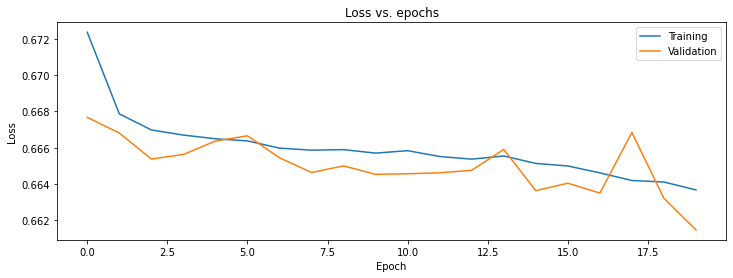

In [ ]:
#plot learning curves for our best model (model 6)
frame = pd.DataFrame(history6.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

PART 1.D THREE DIFF OPTIMIZERS

In [ ]:
tf.keras.backend.clear_session()
model6_RMS = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS = model6_RMS.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 5s 7ms/step - loss: 0.6724 - recall: 0.3725 - precision: 0.6397 - true_positives: 6673.0000 - val_loss: 0.6686 - val_recall: 0.3497 - val_precision: 0.6582 - val_true_positives: 1088.0000
Epoch 2/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6692 - recall: 0.3662 - precision: 0.6573 - true_positives: 6561.0000 - val_loss: 0.6677 - val_recall: 0.3382 - val_precision: 0.6726 - val_true_positives: 1052.0000
Epoch 3/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6682 - recall: 0.3748 - precision: 0.6501 - true_positives: 6715.0000 - val_loss: 0.6658 - val_recall: 0.3362 - val_precision: 0.6757 - val_true_positives: 1046.0000
Epoch 4/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6677 - recall: 0.3694 - precision: 0.6615 - true_positives: 6618.0000 - val_loss: 0.6641 - val_recall: 0.3562 - val_precision: 0.6518 - val_true_positives: 1108.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_SGD = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_SGD.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_SGD = model6_SGD.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 4s 6ms/step - loss: 0.6849 - recall: 0.4292 - precision: 0.6036 - true_positives: 7688.0000 - val_loss: 0.6787 - val_recall: 0.3520 - val_precision: 0.6581 - val_true_positives: 1095.0000
Epoch 2/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6743 - recall: 0.3620 - precision: 0.6618 - true_positives: 6484.0000 - val_loss: 0.6713 - val_recall: 0.3504 - val_precision: 0.6582 - val_true_positives: 1090.0000
Epoch 3/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6699 - recall: 0.3550 - precision: 0.6666 - true_positives: 6360.0000 - val_loss: 0.6687 - val_recall: 0.3378 - val_precision: 0.6729 - val_true_positives: 1051.0000
Epoch 4/20
558/558 [==============================] - 3s 5ms/step - loss: 0.6686 - recall: 0.3454 - precision: 0.6748 - true_positives: 6187.0000 - val_loss: 0.6680 - val_recall: 0.3500 - val_precision: 0.6580 - val_true_positives: 1089.0000
Epoch 5/20
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_ADM = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_ADM.compile(optimizer=tf.keras.optimizers.Adamax(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_ADM = model6_ADM.fit(X_train, Y_train, epochs=20, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/20
558/558 [==============================] - 4s 6ms/step - loss: 0.6705 - recall: 0.3610 - precision: 0.6493 - true_positives: 6467.0000 - val_loss: 0.6667 - val_recall: 0.3462 - val_precision: 0.6587 - val_true_positives: 1077.0000
Epoch 2/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6680 - recall: 0.3556 - precision: 0.6650 - true_positives: 6370.0000 - val_loss: 0.6661 - val_recall: 0.3552 - val_precision: 0.6511 - val_true_positives: 1105.0000
Epoch 3/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6674 - recall: 0.3606 - precision: 0.6645 - true_positives: 6459.0000 - val_loss: 0.6662 - val_recall: 0.3684 - val_precision: 0.6427 - val_true_positives: 1146.0000
Epoch 4/20
558/558 [==============================] - 3s 6ms/step - loss: 0.6670 - recall: 0.3671 - precision: 0.6615 - true_positives: 6576.0000 - val_loss: 0.6662 - val_recall: 0.3754 - val_precision: 0.6421 - val_true_positives: 1168.0000
Epoch 5/20
558/558 [============

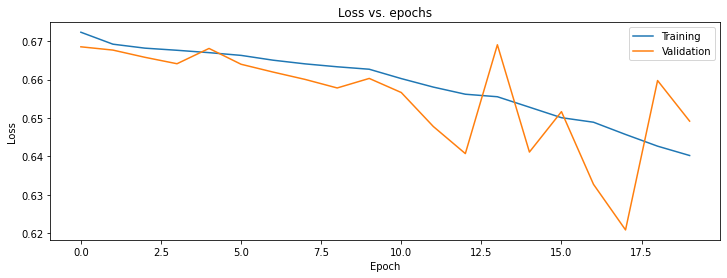

In [ ]:
#plot learning curves for our best model (model 6 w/ RMS)
frame = pd.DataFrame(history6_RMS.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Yes, the RMS Prop optimizer increased our recall.

PART 1.E THREE DIFF EPOCHS

In [ ]:
history6_RMS_5 = model6_RMS.fit(X_train, Y_train, epochs=5, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/5
558/558 [==============================] - 3s 6ms/step - loss: 0.6383 - recall: 0.5945 - precision: 0.6544 - true_positives: 10649.0000 - val_loss: 0.6196 - val_recall: 0.4069 - val_precision: 0.7554 - val_true_positives: 1266.0000
Epoch 2/5
558/558 [==============================] - 3s 6ms/step - loss: 0.6351 - recall: 0.6296 - precision: 0.6467 - true_positives: 11279.0000 - val_loss: 0.6201 - val_recall: 0.4564 - val_precision: 0.7404 - val_true_positives: 1420.0000
Epoch 3/5
558/558 [==============================] - 3s 6ms/step - loss: 0.6341 - recall: 0.6232 - precision: 0.6494 - true_positives: 11164.0000 - val_loss: 0.6135 - val_recall: 0.6843 - val_precision: 0.6841 - val_true_positives: 2129.0000
Epoch 4/5
558/558 [==============================] - 3s 6ms/step - loss: 0.6310 - recall: 0.6255 - precision: 0.6578 - true_positives: 11205.0000 - val_loss: 0.6437 - val_recall: 0.9441 - val_precision: 0.5609 - val_true_positives: 2937.0000
Epoch 5/5
558/558 [=============

In [ ]:
history6_RMS_15 = model6_RMS.fit(X_train, Y_train, epochs=15, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/15
558/558 [==============================] - 4s 7ms/step - loss: 0.6300 - recall: 0.6321 - precision: 0.6527 - true_positives: 11323.0000 - val_loss: 0.6217 - val_recall: 0.8727 - val_precision: 0.6189 - val_true_positives: 2715.0000
Epoch 2/15
558/558 [==============================] - 4s 6ms/step - loss: 0.6305 - recall: 0.6097 - precision: 0.6604 - true_positives: 10922.0000 - val_loss: 0.6257 - val_recall: 0.9103 - val_precision: 0.5765 - val_true_positives: 2832.0000
Epoch 3/15
558/558 [==============================] - 4s 6ms/step - loss: 0.6287 - recall: 0.6164 - precision: 0.6633 - true_positives: 11042.0000 - val_loss: 0.6052 - val_recall: 0.7107 - val_precision: 0.6809 - val_true_positives: 2211.0000
Epoch 4/15
558/558 [==============================] - 3s 6ms/step - loss: 0.6263 - recall: 0.6412 - precision: 0.6572 - true_positives: 11487.0000 - val_loss: 0.6134 - val_recall: 0.4587 - val_precision: 0.7413 - val_true_positives: 1427.0000
Epoch 5/15
558/558 [========

In [ ]:
history6_RMS_30 = model6_RMS.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6170 - recall: 0.6521 - precision: 0.6649 - true_positives: 11682.0000 - val_loss: 0.6102 - val_recall: 0.8631 - val_precision: 0.6272 - val_true_positives: 2685.0000
Epoch 2/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6163 - recall: 0.6425 - precision: 0.6740 - true_positives: 11510.0000 - val_loss: 0.6284 - val_recall: 0.9212 - val_precision: 0.5872 - val_true_positives: 2866.0000
Epoch 3/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6150 - recall: 0.6527 - precision: 0.6723 - true_positives: 11693.0000 - val_loss: 0.5983 - val_recall: 0.4873 - val_precision: 0.7707 - val_true_positives: 1516.0000
Epoch 4/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6165 - recall: 0.6291 - precision: 0.6819 - true_positives: 11269.0000 - val_loss: 0.5943 - val_recall: 0.8065 - val_precision: 0.6570 - val_true_positives: 2509.0000
Epoch 5/30
558/558 [========

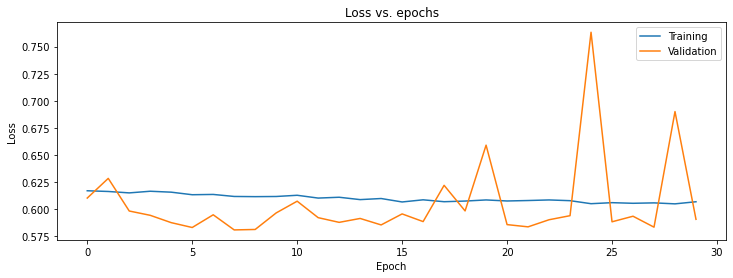

In [ ]:
#plot learning curves for our best model (model 6 w/ RMS & 30 ep.)
frame = pd.DataFrame(history6_RMS_30.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Yes, our recall increased with 30 epochs

PART 1.F INITIALIZERS

In [ ]:
#kernel_initializer=tf.keras.initializers.HeUniform(), bias_initializer=tf.keras.initializers.Ones()
tf.keras.backend.clear_session()
model6_RMS_HE = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer=tf.keras.initializers.HeUniform()),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_HE.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_HE = model6_RMS_HE.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 5s 6ms/step - loss: 0.6741 - recall: 0.3745 - precision: 0.6294 - true_positives: 6709.0000 - val_loss: 0.6684 - val_recall: 0.3150 - val_precision: 0.6763 - val_true_positives: 980.0000
Epoch 2/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6703 - recall: 0.3573 - precision: 0.6549 - true_positives: 6400.0000 - val_loss: 0.6670 - val_recall: 0.3767 - val_precision: 0.6415 - val_true_positives: 1172.0000
Epoch 3/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6689 - recall: 0.3592 - precision: 0.6566 - true_positives: 6434.0000 - val_loss: 0.6736 - val_recall: 0.3513 - val_precision: 0.6608 - val_true_positives: 1093.0000
Epoch 4/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6690 - recall: 0.3569 - precision: 0.6647 - true_positives: 6394.0000 - val_loss: 0.6670 - val_recall: 0.3513 - val_precision: 0.6600 - val_true_positives: 1093.0000
Epoch 5/30
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_randnorm = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer=tf.keras.initializers.RandomNormal()),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_randnorm.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_randnorm = model6_RMS_randnorm.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 5s 6ms/step - loss: 0.6720 - recall: 0.3657 - precision: 0.6411 - true_positives: 6551.0000 - val_loss: 0.6677 - val_recall: 0.3382 - val_precision: 0.6726 - val_true_positives: 1052.0000
Epoch 2/30
558/558 [==============================] - 3s 5ms/step - loss: 0.6695 - recall: 0.3594 - precision: 0.6604 - true_positives: 6439.0000 - val_loss: 0.6663 - val_recall: 0.3295 - val_precision: 0.6770 - val_true_positives: 1025.0000
Epoch 3/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6681 - recall: 0.3661 - precision: 0.6595 - true_positives: 6558.0000 - val_loss: 0.6669 - val_recall: 0.3356 - val_precision: 0.6744 - val_true_positives: 1044.0000
Epoch 4/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6674 - recall: 0.3801 - precision: 0.6556 - true_positives: 6809.0000 - val_loss: 0.6950 - val_recall: 0.9341 - val_precision: 0.5092 - val_true_positives: 2906.0000
Epoch 5/30
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_glo = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer=tf.keras.initializers.GlorotUniform()),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_glo.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_glo = model6_RMS_glo.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 5s 6ms/step - loss: 0.6716 - recall: 0.3757 - precision: 0.6409 - true_positives: 6731.0000 - val_loss: 0.6661 - val_recall: 0.3369 - val_precision: 0.6735 - val_true_positives: 1048.0000
Epoch 2/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6688 - recall: 0.3649 - precision: 0.6553 - true_positives: 6537.0000 - val_loss: 0.6901 - val_recall: 0.3754 - val_precision: 0.6432 - val_true_positives: 1168.0000
Epoch 3/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6681 - recall: 0.3713 - precision: 0.6592 - true_positives: 6651.0000 - val_loss: 0.6671 - val_recall: 0.3851 - val_precision: 0.6362 - val_true_positives: 1198.0000
Epoch 4/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6674 - recall: 0.3915 - precision: 0.6486 - true_positives: 7013.0000 - val_loss: 0.6639 - val_recall: 0.3809 - val_precision: 0.6437 - val_true_positives: 1185.0000
Epoch 5/30
558/558 [============

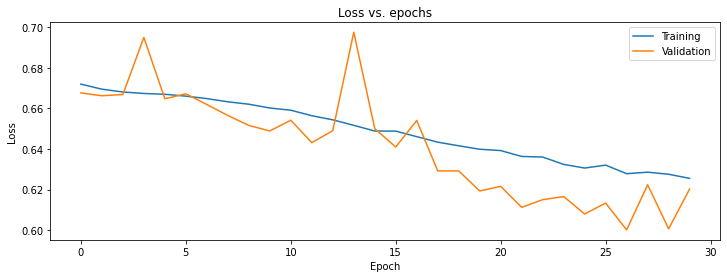

In [ ]:
#best model out of part f
frame = pd.DataFrame(history6_RMS_randnorm.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

No, using different weight initializers did not increase our recall.

PART 1.G WHICH WAS OUR BEST MODEL?

In [ ]:
#best model
#ran it again, but the seed does not work so use the first run
tf.keras.backend.clear_session()
model6_RMS = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS = model6_RMS.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 5s 6ms/step - loss: 0.6723 - recall: 0.3864 - precision: 0.6316 - true_positives: 6922.0000 - val_loss: 0.6672 - val_recall: 0.3568 - val_precision: 0.6518 - val_true_positives: 1110.0000
Epoch 2/30
558/558 [==============================] - 3s 5ms/step - loss: 0.6693 - recall: 0.3696 - precision: 0.6564 - true_positives: 6621.0000 - val_loss: 0.6679 - val_recall: 0.3886 - val_precision: 0.6380 - val_true_positives: 1209.0000
Epoch 3/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6683 - recall: 0.3903 - precision: 0.6442 - true_positives: 6991.0000 - val_loss: 0.6662 - val_recall: 0.3365 - val_precision: 0.6733 - val_true_positives: 1047.0000
Epoch 4/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6676 - recall: 0.3732 - precision: 0.6542 - true_positives: 6686.0000 - val_loss: 0.6684 - val_recall: 0.3558 - val_precision: 0.6500 - val_true_positives: 1107.0000
Epoch 5/30
558/558 [============

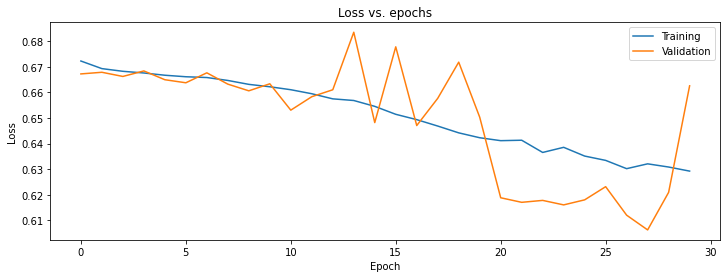

In [ ]:
#best model plot
frame = pd.DataFrame(history6_RMS.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Part 2

### b

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.05)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.05)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.05)),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.05)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.05)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.05)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.05))
])

model6_RMS_L2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_30 = model6_RMS_L2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 0.7022 - recall: 0.3432 - precision: 0.6640 - true_positives: 6151.0000 - val_loss: 0.6870 - val_recall: 0.3509 - val_precision: 0.6611 - val_true_positives: 1104.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6861 - recall: 0.3451 - precision: 0.6710 - true_positives: 6186.0000 - val_loss: 0.6874 - val_recall: 0.2982 - val_precision: 0.6842 - val_true_positives: 938.0000
Epoch 3/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6848 - recall: 0.3546 - precision: 0.6665 - true_positives: 6355.0000 - val_loss: 0.6866 - val_recall: 0.3519 - val_precision: 0.6601 - val_true_positives: 1107.0000
Epoch 4/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6842 - recall: 0.3757 - precision: 0.6586 - true_positives: 6734.0000 - val_loss: 0.6851 - val_recall: 0.3373 - val_precision: 0.6732 - val_true_positives: 1061.0000
Epoch 5/30
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_L2_2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_31 = model6_RMS_L2_2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 0.6802 - recall: 0.3754 - precision: 0.6506 - true_positives: 6729.0000 - val_loss: 0.6749 - val_recall: 0.3309 - val_precision: 0.6755 - val_true_positives: 1041.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6730 - recall: 0.3626 - precision: 0.6696 - true_positives: 6498.0000 - val_loss: 0.6748 - val_recall: 0.2928 - val_precision: 0.6914 - val_true_positives: 921.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6719 - recall: 0.3667 - precision: 0.6639 - true_positives: 6573.0000 - val_loss: 0.6765 - val_recall: 0.3385 - val_precision: 0.6741 - val_true_positives: 1065.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6714 - recall: 0.3707 - precision: 0.6648 - true_positives: 6644.0000 - val_loss: 0.6724 - val_recall: 0.3382 - val_precision: 0.6738 - val_true_positives: 1064.0000
Epoch 5/30
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.L2(0.001))
])

model6_RMS_L2_3.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_32 = model6_RMS_L2_3.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.6725 - recall: 0.3809 - precision: 0.6495 - true_positives: 6827.0000 - val_loss: 0.6698 - val_recall: 0.3312 - val_precision: 0.6740 - val_true_positives: 1042.0000
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6684 - recall: 0.3505 - precision: 0.6757 - true_positives: 6282.0000 - val_loss: 0.6691 - val_recall: 0.3325 - val_precision: 0.6735 - val_true_positives: 1046.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6677 - recall: 0.3614 - precision: 0.6729 - true_positives: 6478.0000 - val_loss: 0.6698 - val_recall: 0.3338 - val_precision: 0.6735 - val_true_positives: 1050.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6674 - recall: 0.3561 - precision: 0.6745 - true_positives: 6382.0000 - val_loss: 0.6708 - val_recall: 0.3420 - val_precision: 0.6729 - val_true_positives: 1076.0000
Epoch 5/30
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_4 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.L2(0.1)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.L2(0.1)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.L2(0.1)),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.L2(0.1)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.1)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.L2(0.1)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.L2(0.1))
])

model6_RMS_L2_4.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_33 = model6_RMS_L2_4.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.7302 - recall: 0.3302 - precision: 0.6603 - true_positives: 5918.0000 - val_loss: 0.7028 - val_recall: 0.2854 - val_precision: 0.6902 - val_true_positives: 898.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.7002 - recall: 0.3346 - precision: 0.6766 - true_positives: 5997.0000 - val_loss: 0.6994 - val_recall: 0.3210 - val_precision: 0.6738 - val_true_positives: 1010.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6982 - recall: 0.3345 - precision: 0.6794 - true_positives: 5995.0000 - val_loss: 0.6972 - val_recall: 0.3338 - val_precision: 0.6739 - val_true_positives: 1050.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6975 - recall: 0.3378 - precision: 0.6780 - true_positives: 6055.0000 - val_loss: 0.6991 - val_recall: 0.3373 - val_precision: 0.6741 - val_true_positives: 1061.0000
Epoch 5/30
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.02)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.02))
])

model6_RMS_L2_5.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_34 = model6_RMS_L2_5.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.6864 - recall: 0.3561 - precision: 0.6661 - true_positives: 6383.0000 - val_loss: 0.6781 - val_recall: 0.3376 - val_precision: 0.6734 - val_true_positives: 1062.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6766 - recall: 0.3634 - precision: 0.6647 - true_positives: 6514.0000 - val_loss: 0.6785 - val_recall: 0.3382 - val_precision: 0.6738 - val_true_positives: 1064.0000
Epoch 3/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6755 - recall: 0.3525 - precision: 0.6726 - true_positives: 6318.0000 - val_loss: 0.6764 - val_recall: 0.3252 - val_precision: 0.6857 - val_true_positives: 1023.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6752 - recall: 0.3701 - precision: 0.6614 - true_positives: 6633.0000 - val_loss: 0.6756 - val_recall: 0.3455 - val_precision: 0.6702 - val_true_positives: 1087.0000
Epoch 5/30
558/558 [============

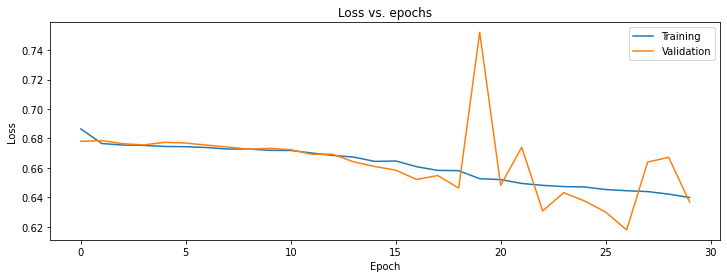

In [ ]:
#best model with L2
frame = pd.DataFrame(history6_RMS_L2_34.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


### c

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_dropout = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_dropout.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_dropout = model6_RMS_dropout.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 10ms/step - loss: 0.6843 - recall: 0.4607 - precision: 0.5691 - true_positives: 8257.0000 - val_loss: 0.6739 - val_recall: 0.2483 - val_precision: 0.6930 - val_true_positives: 781.0000
Epoch 2/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6765 - recall: 0.3296 - precision: 0.6623 - true_positives: 5908.0000 - val_loss: 0.6844 - val_recall: 0.1084 - val_precision: 0.8119 - val_true_positives: 341.0000
Epoch 3/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6760 - recall: 0.3303 - precision: 0.6649 - true_positives: 5920.0000 - val_loss: 0.6756 - val_recall: 0.2254 - val_precision: 0.7264 - val_true_positives: 709.0000
Epoch 4/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6761 - recall: 0.3385 - precision: 0.6677 - true_positives: 6067.0000 - val_loss: 0.6820 - val_recall: 0.2025 - val_precision: 0.7364 - val_true_positives: 637.0000
Epoch 5/30
558/558 [===============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_dropout2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dropout(0.8),
    Dense(256, activation="relu"),
    Dropout(0.7),
    Dense(256, activation="relu"),
    Dropout(0.6),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_dropout2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_dropout2 = model6_RMS_dropout2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 9ms/step - loss: 0.6836 - recall: 0.4968 - precision: 0.5537 - true_positives: 8904.0000 - val_loss: 0.6886 - val_recall: 0.1043 - val_precision: 0.8099 - val_true_positives: 328.0000
Epoch 2/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6747 - recall: 0.3550 - precision: 0.6483 - true_positives: 6362.0000 - val_loss: 0.6819 - val_recall: 0.2285 - val_precision: 0.6960 - val_true_positives: 719.0000
Epoch 3/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6750 - recall: 0.3332 - precision: 0.6715 - true_positives: 5972.0000 - val_loss: 0.6762 - val_recall: 0.2645 - val_precision: 0.6916 - val_true_positives: 832.0000
Epoch 4/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6757 - recall: 0.3350 - precision: 0.6653 - true_positives: 6004.0000 - val_loss: 0.6715 - val_recall: 0.2997 - val_precision: 0.6858 - val_true_positives: 943.0000
Epoch 5/30
558/558 [================

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_dropout3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dropout(0.8),
    Dense(256, activation="relu"),
    Dropout(0.7),
    Dense(256, activation="relu"),
    Dropout(0.6),
    Dense(128, activation="relu"),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_dropout3.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_dropout3 = model6_RMS_dropout3.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.6824 - recall: 0.5004 - precision: 0.5632 - true_positives: 8968.0000 - val_loss: 0.6886 - val_recall: 0.1465 - val_precision: 0.7709 - val_true_positives: 461.0000
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6729 - recall: 0.3577 - precision: 0.6537 - true_positives: 6411.0000 - val_loss: 0.6697 - val_recall: 0.3252 - val_precision: 0.6793 - val_true_positives: 1023.0000
Epoch 3/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6733 - recall: 0.3336 - precision: 0.6703 - true_positives: 5980.0000 - val_loss: 0.6742 - val_recall: 0.3242 - val_precision: 0.6791 - val_true_positives: 1020.0000
Epoch 4/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6748 - recall: 0.3434 - precision: 0.6624 - true_positives: 6154.0000 - val_loss: 0.6712 - val_recall: 0.3242 - val_precision: 0.6791 - val_true_positives: 1020.0000
Epoch 5/30
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_dropout4 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dropout(0.8),
    Dense(256, activation="relu"),
    #Dropout(0.7),
    Dense(256, activation="relu"),
    #Dropout(0.6),
    Dense(128, activation="relu"),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_dropout4.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_dropout4 = model6_RMS_dropout4.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.6748 - recall: 0.4252 - precision: 0.6058 - true_positives: 7621.0000 - val_loss: 0.6701 - val_recall: 0.3166 - val_precision: 0.6780 - val_true_positives: 996.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6715 - recall: 0.3671 - precision: 0.6583 - true_positives: 6580.0000 - val_loss: 0.6723 - val_recall: 0.3258 - val_precision: 0.6784 - val_true_positives: 1025.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6698 - recall: 0.3638 - precision: 0.6641 - true_positives: 6521.0000 - val_loss: 0.6761 - val_recall: 0.2883 - val_precision: 0.6903 - val_true_positives: 907.0000
Epoch 4/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6695 - recall: 0.3666 - precision: 0.6652 - true_positives: 6570.0000 - val_loss: 0.6739 - val_recall: 0.3242 - val_precision: 0.6791 - val_true_positives: 1020.0000
Epoch 5/30
558/558 [==============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_dropout5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    Dropout(0.8),
    Dense(256, activation="relu"),
    #Dropout(0.7),
    Dense(256, activation="relu"),
    #Dropout(0.6),
    Dense(128, activation="relu"),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(64, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_dropout5.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_dropout5 = model6_RMS_dropout5.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.6745 - recall: 0.4040 - precision: 0.6107 - true_positives: 7240.0000 - val_loss: 0.6732 - val_recall: 0.3210 - val_precision: 0.6788 - val_true_positives: 1010.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6709 - recall: 0.3643 - precision: 0.6554 - true_positives: 6530.0000 - val_loss: 0.6747 - val_recall: 0.2934 - val_precision: 0.6852 - val_true_positives: 923.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6704 - recall: 0.3633 - precision: 0.6632 - true_positives: 6511.0000 - val_loss: 0.6690 - val_recall: 0.3357 - val_precision: 0.6743 - val_true_positives: 1056.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6695 - recall: 0.3615 - precision: 0.6644 - true_positives: 6479.0000 - val_loss: 0.6719 - val_recall: 0.3382 - val_precision: 0.6738 - val_true_positives: 1064.0000
Epoch 5/30
558/558 [=============

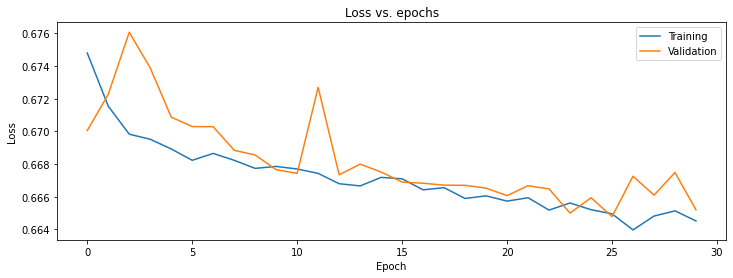

In [ ]:
#best model with dropout
frame = pd.DataFrame(history6_RMS_30_dropout4.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## d

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_2_drop1 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.8),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.8),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_L2_2_drop1.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_31_drop1 = model6_RMS_L2_2_drop1.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 9ms/step - loss: 0.6978 - recall: 0.4122 - precision: 0.6023 - true_positives: 7388.0000 - val_loss: 0.6937 - val_recall: 0.1020 - val_precision: 0.8127 - val_true_positives: 321.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6825 - recall: 0.3677 - precision: 0.6409 - true_positives: 6591.0000 - val_loss: 0.6856 - val_recall: 0.1526 - val_precision: 0.7680 - val_true_positives: 480.0000
Epoch 3/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6813 - recall: 0.3503 - precision: 0.6443 - true_positives: 6278.0000 - val_loss: 0.6855 - val_recall: 0.1491 - val_precision: 0.7714 - val_true_positives: 469.0000
Epoch 4/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6803 - recall: 0.3342 - precision: 0.6530 - true_positives: 5990.0000 - val_loss: 0.6817 - val_recall: 0.1605 - val_precision: 0.7560 - val_true_positives: 505.0000
Epoch 5/30
558/558 [================

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_2_drop2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.8),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.9),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.9),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.9),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.9),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_L2_2_drop2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_31_drop2 = model6_RMS_L2_2_drop2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 7ms/step - loss: 1.3602 - recall: 0.6618 - precision: 0.4962 - true_positives: 11801.0000 - val_loss: 0.6956 - val_recall: 1.0000 - val_precision: 0.5035 - val_true_positives: 3172.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6957 - recall: 0.0956 - precision: 0.4931 - true_positives: 1704.0000 - val_loss: 0.6957 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6957 - recall: 0.0000e+00 - precision: 0.0000e+00 - true_positives: 0.0000e+00 - val_loss: 0.6957 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6957 - recall: 0.1558 - precision: 0.4934 - true_positives: 2779.0000 - val_loss: 0.6957 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_2_drop3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_L2_2_drop3.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_31_drop3 = model6_RMS_L2_2_drop3.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 9ms/step - loss: 0.6897 - recall: 0.4375 - precision: 0.5948 - true_positives: 7841.0000 - val_loss: 0.6791 - val_recall: 0.3296 - val_precision: 0.6751 - val_true_positives: 1037.0000
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6810 - recall: 0.3314 - precision: 0.6611 - true_positives: 5940.0000 - val_loss: 0.6767 - val_recall: 0.3382 - val_precision: 0.6734 - val_true_positives: 1064.0000
Epoch 3/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6808 - recall: 0.3350 - precision: 0.6599 - true_positives: 6004.0000 - val_loss: 0.6799 - val_recall: 0.3096 - val_precision: 0.6859 - val_true_positives: 974.0000
Epoch 4/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6793 - recall: 0.3510 - precision: 0.6541 - true_positives: 6291.0000 - val_loss: 0.6751 - val_recall: 0.3376 - val_precision: 0.6739 - val_true_positives: 1062.0000
Epoch 5/30
558/558 [=============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_2_drop4 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_L2_2_drop4.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_31_drop4 = model6_RMS_L2_2_drop4.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 9ms/step - loss: 0.6896 - recall: 0.3887 - precision: 0.6164 - true_positives: 6967.0000 - val_loss: 0.6792 - val_recall: 0.2880 - val_precision: 0.6900 - val_true_positives: 906.0000
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6804 - recall: 0.3283 - precision: 0.6656 - true_positives: 5884.0000 - val_loss: 0.6824 - val_recall: 0.2060 - val_precision: 0.7314 - val_true_positives: 648.0000
Epoch 3/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6799 - recall: 0.3462 - precision: 0.6498 - true_positives: 6205.0000 - val_loss: 0.6797 - val_recall: 0.3166 - val_precision: 0.6780 - val_true_positives: 996.0000
Epoch 4/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6803 - recall: 0.3594 - precision: 0.6378 - true_positives: 6442.0000 - val_loss: 0.6829 - val_recall: 0.2206 - val_precision: 0.7267 - val_true_positives: 694.0000
Epoch 5/30
558/558 [================

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_L2_2_drop5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu", activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_L2_2_drop5.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_L2_31_drop5 = model6_RMS_L2_2_drop5.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.6831 - recall: 0.3722 - precision: 0.6440 - true_positives: 6671.0000 - val_loss: 0.6783 - val_recall: 0.3306 - val_precision: 0.6744 - val_true_positives: 1040.0000
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6770 - recall: 0.3782 - precision: 0.6531 - true_positives: 6779.0000 - val_loss: 0.6742 - val_recall: 0.3369 - val_precision: 0.6743 - val_true_positives: 1060.0000
Epoch 3/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6750 - recall: 0.3705 - precision: 0.6631 - true_positives: 6641.0000 - val_loss: 0.6834 - val_recall: 0.3522 - val_precision: 0.6655 - val_true_positives: 1108.0000
Epoch 4/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6748 - recall: 0.3677 - precision: 0.6607 - true_positives: 6591.0000 - val_loss: 0.6750 - val_recall: 0.3398 - val_precision: 0.6740 - val_true_positives: 1069.0000
Epoch 5/30
558/558 [============

## e

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch = model6_RMS_batch.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 8s 9ms/step - loss: 0.6778 - recall: 0.4287 - precision: 0.6134 - true_positives: 7683.0000 - val_loss: 0.6708 - val_recall: 0.3935 - val_precision: 0.6516 - val_true_positives: 1238.0000
Epoch 2/30
558/558 [==============================] - 5s 10ms/step - loss: 0.6582 - recall: 0.5067 - precision: 0.6296 - true_positives: 9082.0000 - val_loss: 1.3242 - val_recall: 0.5381 - val_precision: 0.5798 - val_true_positives: 1693.0000
Epoch 3/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6341 - recall: 0.6128 - precision: 0.6435 - true_positives: 10984.0000 - val_loss: 0.8024 - val_recall: 0.7775 - val_precision: 0.5234 - val_true_positives: 2446.0000
Epoch 4/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6207 - recall: 0.6516 - precision: 0.6574 - true_positives: 11678.0000 - val_loss: 0.8088 - val_recall: 0.8865 - val_precision: 0.5084 - val_true_positives: 2789.0000
Epoch 5/30
558/558 [=========

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.99,),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch2 = model6_RMS_batch2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 8s 11ms/step - loss: 0.6714 - recall: 0.3906 - precision: 0.6458 - true_positives: 7000.0000 - val_loss: 0.6688 - val_recall: 0.3325 - val_precision: 0.6744 - val_true_positives: 1046.0000
Epoch 2/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6671 - recall: 0.3725 - precision: 0.6681 - true_positives: 6677.0000 - val_loss: 0.6663 - val_recall: 0.3900 - val_precision: 0.6527 - val_true_positives: 1227.0000
Epoch 3/30
558/558 [==============================] - 4s 8ms/step - loss: 0.6560 - recall: 0.5044 - precision: 0.6386 - true_positives: 9041.0000 - val_loss: 0.6774 - val_recall: 0.3989 - val_precision: 0.6907 - val_true_positives: 1255.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6358 - recall: 0.6274 - precision: 0.6472 - true_positives: 11244.0000 - val_loss: 0.6261 - val_recall: 0.4787 - val_precision: 0.7223 - val_true_positives: 1506.0000
Epoch 5/30
558/558 [==========

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.75),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch3.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch3 = model6_RMS_batch3.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 9ms/step - loss: 0.6706 - recall: 0.3840 - precision: 0.6509 - true_positives: 6882.0000 - val_loss: 0.6696 - val_recall: 0.3379 - val_precision: 0.6736 - val_true_positives: 1063.0000
Epoch 2/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6676 - recall: 0.3733 - precision: 0.6613 - true_positives: 6690.0000 - val_loss: 0.6685 - val_recall: 0.5305 - val_precision: 0.5807 - val_true_positives: 1669.0000
Epoch 3/30
558/558 [==============================] - 5s 9ms/step - loss: 0.6560 - recall: 0.5230 - precision: 0.6338 - true_positives: 9373.0000 - val_loss: 0.6301 - val_recall: 0.5715 - val_precision: 0.6572 - val_true_positives: 1798.0000
Epoch 4/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6357 - recall: 0.6355 - precision: 0.6456 - true_positives: 11390.0000 - val_loss: 0.6417 - val_recall: 0.4406 - val_precision: 0.7238 - val_true_positives: 1386.0000
Epoch 5/30
558/558 [===========

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.75),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.75),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.75),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4 = model6_RMS_batch4.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 0.6787 - recall: 0.4393 - precision: 0.6066 - true_positives: 7873.0000 - val_loss: 0.6752 - val_recall: 0.3598 - val_precision: 0.6647 - val_true_positives: 1132.0000
Epoch 2/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6582 - recall: 0.5129 - precision: 0.6217 - true_positives: 9193.0000 - val_loss: 0.6901 - val_recall: 0.7444 - val_precision: 0.5216 - val_true_positives: 2342.0000
Epoch 3/30
558/558 [==============================] - 5s 8ms/step - loss: 0.6379 - recall: 0.6165 - precision: 0.6376 - true_positives: 11049.0000 - val_loss: 0.6562 - val_recall: 0.7896 - val_precision: 0.5854 - val_true_positives: 2484.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6215 - recall: 0.6735 - precision: 0.6451 - true_positives: 12071.0000 - val_loss: 0.6680 - val_recall: 0.5102 - val_precision: 0.6657 - val_true_positives: 1605.0000
Epoch 5/30
558/558 [==========

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.75, moving_mean_initializer='ones'),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.75),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.75),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch5.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch5 = model6_RMS_batch5.fit(X_train, Y_train, epochs=30, validation_split=0.10, batch_size=64,verbose=True)

Epoch 1/30
591/591 [==============================] - 8s 9ms/step - loss: 0.6776 - recall: 0.4337 - precision: 0.6124 - true_positives: 8217.0000 - val_loss: 0.6690 - val_recall: 0.3602 - val_precision: 0.6785 - val_true_positives: 764.0000
Epoch 2/30
591/591 [==============================] - 5s 8ms/step - loss: 0.6701 - recall: 0.4074 - precision: 0.6387 - true_positives: 7719.0000 - val_loss: 0.6650 - val_recall: 0.3597 - val_precision: 0.6874 - val_true_positives: 763.0000
Epoch 3/30
591/591 [==============================] - 5s 9ms/step - loss: 0.6363 - recall: 0.6290 - precision: 0.6362 - true_positives: 11918.0000 - val_loss: 0.8938 - val_recall: 0.3753 - val_precision: 0.6786 - val_true_positives: 796.0000
Epoch 4/30
591/591 [==============================] - 6s 10ms/step - loss: 0.6229 - recall: 0.6447 - precision: 0.6518 - true_positives: 12216.0000 - val_loss: 0.6462 - val_recall: 0.8157 - val_precision: 0.5923 - val_true_positives: 1730.0000
Epoch 5/30
591/591 [============

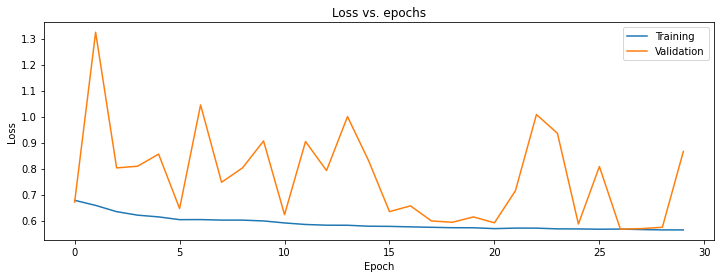

In [ ]:
#best model with batch and dropout
frame = pd.DataFrame(history6_RMS_30_batch.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## f

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4_drop.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop = model6_RMS_batch4_drop.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 7ms/step - loss: 0.6981 - recall: 0.4609 - precision: 0.5728 - true_positives: 8219.0000 - val_loss: 0.6710 - val_recall: 0.3468 - val_precision: 0.6615 - val_true_positives: 1100.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6782 - recall: 0.4018 - precision: 0.6126 - true_positives: 7165.0000 - val_loss: 0.6701 - val_recall: 0.5139 - val_precision: 0.5895 - val_true_positives: 1630.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6742 - recall: 0.4004 - precision: 0.6294 - true_positives: 7141.0000 - val_loss: 0.6699 - val_recall: 0.3351 - val_precision: 0.6732 - val_true_positives: 1063.0000
Epoch 4/30
558/558 [==============================] - 4s 6ms/step - loss: 0.6709 - recall: 0.3860 - precision: 0.6427 - true_positives: 6883.0000 - val_loss: 0.6717 - val_recall: 0.3351 - val_precision: 0.6732 - val_true_positives: 1063.0000
Epoch 5/30
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.99),
    Dropout(0.8),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4_drop2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop2 = model6_RMS_batch4_drop2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 0.7024 - recall: 0.4649 - precision: 0.5617 - true_positives: 8290.0000 - val_loss: 0.6720 - val_recall: 0.5473 - val_precision: 0.5760 - val_true_positives: 1736.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6810 - recall: 0.4266 - precision: 0.5976 - true_positives: 7607.0000 - val_loss: 0.6711 - val_recall: 0.3329 - val_precision: 0.6730 - val_true_positives: 1056.0000
Epoch 3/30
558/558 [==============================] - 4s 6ms/step - loss: 0.6762 - recall: 0.3872 - precision: 0.6286 - true_positives: 6905.0000 - val_loss: 0.6689 - val_recall: 0.3329 - val_precision: 0.6730 - val_true_positives: 1056.0000
Epoch 4/30
558/558 [==============================] - 4s 6ms/step - loss: 0.6734 - recall: 0.3811 - precision: 0.6343 - true_positives: 6797.0000 - val_loss: 0.6707 - val_recall: 0.3348 - val_precision: 0.6730 - val_true_positives: 1062.0000
Epoch 5/30
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.75),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.75),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.75),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4_drop3.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop3 = model6_RMS_batch4_drop3.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 7ms/step - loss: 0.6966 - recall: 0.4812 - precision: 0.5692 - true_positives: 8582.0000 - val_loss: 0.6745 - val_recall: 0.3345 - val_precision: 0.6724 - val_true_positives: 1061.0000
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6765 - recall: 0.4394 - precision: 0.6000 - true_positives: 7836.0000 - val_loss: 0.6919 - val_recall: 0.3805 - val_precision: 0.6461 - val_true_positives: 1207.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6753 - recall: 0.4104 - precision: 0.6196 - true_positives: 7318.0000 - val_loss: 0.6737 - val_recall: 0.3846 - val_precision: 0.6391 - val_true_positives: 1220.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6697 - recall: 0.3991 - precision: 0.6390 - true_positives: 7117.0000 - val_loss: 0.6680 - val_recall: 0.3830 - val_precision: 0.6494 - val_true_positives: 1215.0000
Epoch 6/30
558/558 [============

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop4 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.75),
    Dropout(0.9),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.75),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.75),
    Dropout(0.9),
    Dense(128, activation="relu"),
    BatchNormalization(momentum=0.75),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.75),
    Dropout(0.9),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4_drop4.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop4 = model6_RMS_batch4_drop4.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 0.7662 - recall: 0.4840 - precision: 0.5156 - true_positives: 8631.0000 - val_loss: 0.6951 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.7041 - recall: 0.4097 - precision: 0.5408 - true_positives: 7306.0000 - val_loss: 0.6879 - val_recall: 0.1715 - val_precision: 0.7452 - val_true_positives: 544.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6885 - recall: 0.3597 - precision: 0.5880 - true_positives: 6415.0000 - val_loss: 0.6758 - val_recall: 0.1731 - val_precision: 0.7459 - val_true_positives: 549.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6812 - recall: 0.3268 - precision: 0.6299 - true_positives: 5827.0000 - val_loss: 0.6736 - val_recall: 0.2856 - val_precision: 0.6991 - val_true_positives: 906.0000
Epoch 5/30
558/558 [======

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4_drop5.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop5 = model6_RMS_batch4_drop5.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 7ms/step - loss: 0.6998 - recall: 0.4692 - precision: 0.5662 - true_positives: 8368.0000 - val_loss: 0.6723 - val_recall: 0.3518 - val_precision: 0.6671 - val_true_positives: 1116.0000
Epoch 2/30
558/558 [==============================] - 4s 6ms/step - loss: 0.6790 - recall: 0.4210 - precision: 0.6035 - true_positives: 7507.0000 - val_loss: 0.6738 - val_recall: 0.3449 - val_precision: 0.6610 - val_true_positives: 1094.0000
Epoch 3/30
558/558 [==============================] - 4s 6ms/step - loss: 0.6729 - recall: 0.4014 - precision: 0.6314 - true_positives: 7158.0000 - val_loss: 0.6775 - val_recall: 0.3348 - val_precision: 0.6730 - val_true_positives: 1062.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6719 - recall: 0.4080 - precision: 0.6280 - true_positives: 7275.0000 - val_loss: 0.6720 - val_recall: 0.3811 - val_precision: 0.6451 - val_true_positives: 1209.0000
Epoch 5/30
558/558 [============

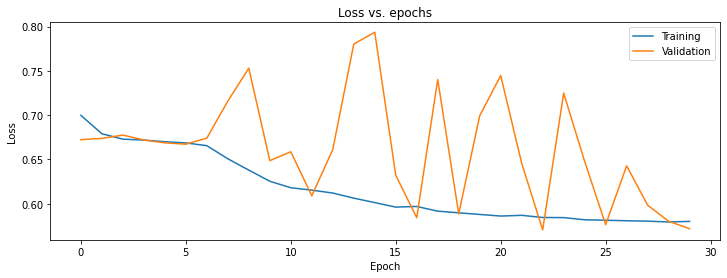

In [ ]:
# Plot the learning curves with batch, dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
frame = pd.DataFrame(history6_RMS_30_batch4_drop5.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## g

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop5_L2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_batch4_drop5_L2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop5_L2 = model6_RMS_batch4_drop5_L2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 1.2752 - recall: 0.2721 - precision: 0.5677 - true_positives: 4853.0000 - val_loss: 0.6997 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.7023 - recall: 0.1427 - precision: 0.7273 - true_positives: 2544.0000 - val_loss: 0.6889 - val_recall: 0.2005 - val_precision: 0.7310 - val_true_positives: 636.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6941 - recall: 0.1976 - precision: 0.6726 - true_positives: 3524.0000 - val_loss: 0.6885 - val_recall: 0.2241 - val_precision: 0.7204 - val_true_positives: 711.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6902 - recall: 0.2231 - precision: 0.6639 - true_positives: 3979.0000 - val_loss: 0.6858 - val_recall: 0.1731 - val_precision: 0.7459 - val_true_positives: 549.0000
Epoch 5/30
558/558 [======

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop5_L2_2 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.7),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.7),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.7),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_batch4_drop5_L2_2.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop5_L2_2 = model6_RMS_batch4_drop5_L2_2.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 1.9353 - recall: 0.3430 - precision: 0.5139 - true_positives: 6116.0000 - val_loss: 0.6980 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6979 - recall: 0.0408 - precision: 0.5084 - true_positives: 728.0000 - val_loss: 0.6957 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6957 - recall: 0.0498 - precision: 0.4858 - true_positives: 888.0000 - val_loss: 0.6957 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6957 - recall: 0.0685 - precision: 0.4902 - true_positives: 1222.0000 - val_loss: 0.6957 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+0

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop5_L2_3 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_batch4_drop5_L2_3.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop5_L2_3 = model6_RMS_batch4_drop5_L2_3.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 1.2928 - recall: 0.2797 - precision: 0.5627 - true_positives: 4987.0000 - val_loss: 0.7000 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6997 - recall: 0.1270 - precision: 0.6600 - true_positives: 2265.0000 - val_loss: 0.6924 - val_recall: 0.1992 - val_precision: 0.7273 - val_true_positives: 632.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6931 - recall: 0.2354 - precision: 0.6557 - true_positives: 4198.0000 - val_loss: 0.6875 - val_recall: 0.2109 - val_precision: 0.7272 - val_true_positives: 669.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6907 - recall: 0.2254 - precision: 0.6733 - true_positives: 4019.0000 - val_loss: 0.6852 - val_recall: 0.3228 - val_precision: 0.6804 - val_true_positives: 1024.0000
Epoch 5/30
558/558 [=====

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop5_L2_5 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.3),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.3),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.3),
    Dense(64, activation='relu',activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(1, activation = 'sigmoid',activity_regularizer=tf.keras.regularizers.l2(0.01))
])

model6_RMS_batch4_drop5_L2_5.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop5_L2_5 = model6_RMS_batch4_drop5_L2_5.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 6s 8ms/step - loss: 1.0595 - recall: 0.2794 - precision: 0.5771 - true_positives: 4983.0000 - val_loss: 0.7006 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6953 - recall: 0.2188 - precision: 0.6914 - true_positives: 3902.0000 - val_loss: 0.6852 - val_recall: 0.2765 - val_precision: 0.6862 - val_true_positives: 877.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6858 - recall: 0.2764 - precision: 0.6793 - true_positives: 4929.0000 - val_loss: 0.6818 - val_recall: 0.3004 - val_precision: 0.6901 - val_true_positives: 953.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6821 - recall: 0.3077 - precision: 0.6679 - true_positives: 5487.0000 - val_loss: 0.6841 - val_recall: 0.2005 - val_precision: 0.7336 - val_true_positives: 636.0000
Epoch 5/30
558/558 [======

In [ ]:
tf.keras.backend.clear_session()
model6_RMS_batch4_drop5_L2_6 = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.3),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(256, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(momentum=0.99),
    Dropout(0.3),
    Dense(128, activation="relu",activity_regularizer=tf.keras.regularizers.l2(0.01)),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.99),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

model6_RMS_batch4_drop5_L2_6.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history6_RMS_30_batch4_drop5_L2_6 = model6_RMS_batch4_drop5_L2_6.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True)

Epoch 1/30
558/558 [==============================] - 7s 8ms/step - loss: 0.9862 - recall: 0.4225 - precision: 0.5619 - true_positives: 7534.0000 - val_loss: 0.7070 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00 - val_true_positives: 0.0000e+00
Epoch 2/30
558/558 [==============================] - 4s 7ms/step - loss: 0.7043 - recall: 0.3768 - precision: 0.5919 - true_positives: 6720.0000 - val_loss: 0.6807 - val_recall: 0.3354 - val_precision: 0.6646 - val_true_positives: 1064.0000
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6841 - recall: 0.3152 - precision: 0.6372 - true_positives: 5621.0000 - val_loss: 0.6811 - val_recall: 0.1983 - val_precision: 0.7272 - val_true_positives: 629.0000
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6801 - recall: 0.3310 - precision: 0.6446 - true_positives: 5902.0000 - val_loss: 0.6798 - val_recall: 0.2106 - val_precision: 0.7325 - val_true_positives: 668.0000
Epoch 5/30
558/558 [=====

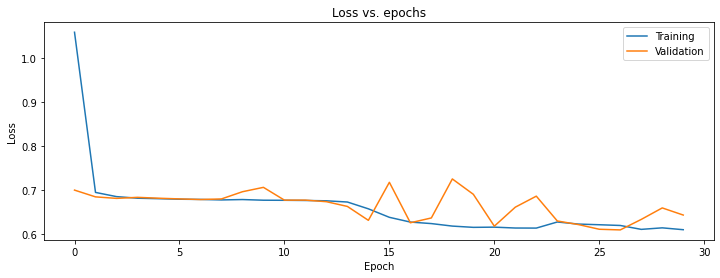

In [ ]:
# Plot the learning curves with batch, dropout and L2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
frame = pd.DataFrame(history6_RMS_30_batch4_drop5_L2_5.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## H

Best model was overall model6_RMS_batch4_drop5 based on F1 score

# Part 3: Run best model on test data

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Create Tensorflow checkpoint object with epoch details

checkpoint_path = 'model_checkpoints/checkpoint' 
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_frequency='epoch',
                             save_weights_only=False,
                             verbose=1)

callbacks=[checkpoint]

In [ ]:
#best model overall model6_RMS_batch4_drop5 based on F1
tf.keras.backend.clear_session()
best = Sequential([
    Dense(256, input_shape=[X_train.shape[1],], activation="relu"),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(64, activation='relu'),
    BatchNormalization(momentum=0.99),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

best.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision(), tf.keras.metrics.TruePositives()])

history_best = best.fit(X_train, Y_train, epochs=30, validation_split=0.15, batch_size=64,verbose=True, callbacks=[checkpoint])

Epoch 1/30
558/558 [==============================] - 6s 7ms/step - loss: 0.6984 - recall: 0.4696 - precision: 0.5647 - true_positives: 8374.0000 - val_loss: 0.6730 - val_recall: 0.3304 - val_precision: 0.6761 - val_true_positives: 1048.0000

Epoch 00001: saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 2/30
558/558 [==============================] - 4s 6ms/step - loss: 0.6784 - recall: 0.4124 - precision: 0.6053 - true_positives: 7354.0000 - val_loss: 0.6710 - val_recall: 0.3348 - val_precision: 0.6730 - val_true_positives: 1062.0000

Epoch 00002: saving model to model_checkpoints/checkpoint
INFO:tensorflow:Assets written to: model_checkpoints/checkpoint/assets
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6725 - recall: 0.3968 - precision: 0.6260 - true_positives: 7077.0000 - val_loss: 0.6693 - val_recall: 0.3503 - val_precision: 0.6641 - val_true_positives: 1111.0000

Epoch 00003: 

In [ ]:
# Introduce function to test model accuracy

def get_test_accuracy(model, x_test, y_test):
    test_loss, test_recall, test_prec, test_TP = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('Test loss: ', test_loss)
    print('Test recall: ', test_recall)
    print('Test precision: ', test_prec)
    print('Test true positives: ', test_TP)

In [ ]:
get_test_accuracy(best, X_test, Y_test)

Test loss:  0.8922790288925171
Test recall:  0.997721791267395
Test precision:  0.5017544031143188
Test true positives:  7007.0


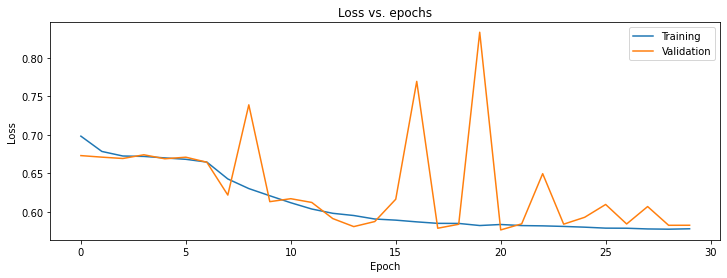

In [ ]:
# Plot the learning curves with batch, dropout and L2
frame = pd.DataFrame(history_best.history)
epochs = np.arange(len(frame))
fig = plt.figure(figsize=(12,4))
plt.plot(frame['loss'])
plt.plot(frame['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#number of true positives in training data
sum(Y_train['cardio'])

21005

In [ ]:
#number of TP in test
sum(Y_test['cardio'])

7023